In [1]:
import seaborn as sns
import csidata as cid


In [3]:
# res = cid.load('recordings/csi/2024-09-23T17-23-22_916551.raw') # jann 
# res = cid.load('recordings/csi/2024-09-24T16-57-45_776611.raw') # felix vorbeilaufen
# res = cid.load('recordings/csi/2024-09-24T17-56-41_341464.raw') # print time inside send loop 1000us
# res = cid.load('recordings/csi/2024-09-24T17-58-29_071208.raw') # NO print time inside send loop 1000us
# res = cid.load('recordings/csi/2024-09-24T19-15-27_005307.raw') # real time scheduling usleep 1000us
# res = cid.load('recordings/csi/2024-09-24T19-21-53_719329.raw') # real time scheduling nanosleep 1000us

# res = cid.load('recordings/csi/2024-09-26T12-45-47_637384.raw') # iw antenna 0x3
# res = cid.load('recordings/csi/2024-09-26T13-44-41_161150.raw') # iw antenna 0x3 mcs 7
# res = cid.load('recordings/csi/2024-09-26T13-57-59_557757.raw') # iw antenna 0x1 mcs 7
# res = cid.load('recordings/csi/2024-09-26T14-01-45_158166.raw') # iw antenna 0x1 mcs 7 / rx antenna 0x1

# res = cid.load('analysis/outside_recording/2024-09-30T19-49-13_586703.joblib') # outside jumping jacks
res = cid.load('recordings/csi/2024-10-11T13-51-55_693628.raw') # philipp grinding coffee

{'ts': '2024-10-11T13-51-55_693628', 'act': None, 'seq': None}


In [4]:
res.csi.shape

(113481, 3, 3, 56)

<Axes: ylabel='Count'>

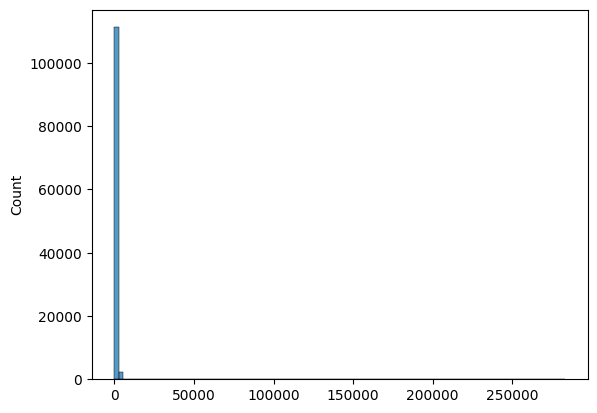

In [5]:
sns.histplot(cid.stats.get_intervals(res)[1:], bins=100)

<Axes: >

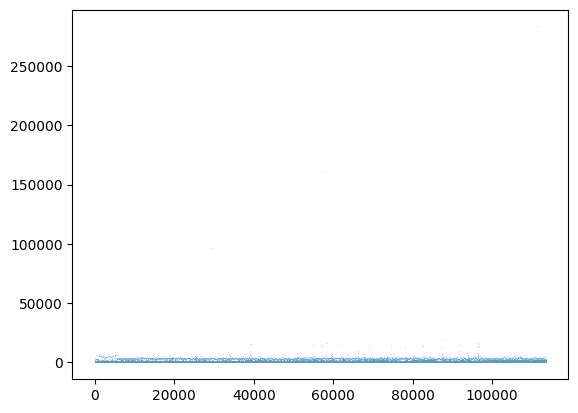

In [6]:
sns.scatterplot(cid.stats.get_intervals(res)[1:], alpha=1, s=0.2)

In [7]:
res.csi.shape

(113481, 3, 3, 56)

<Axes: >

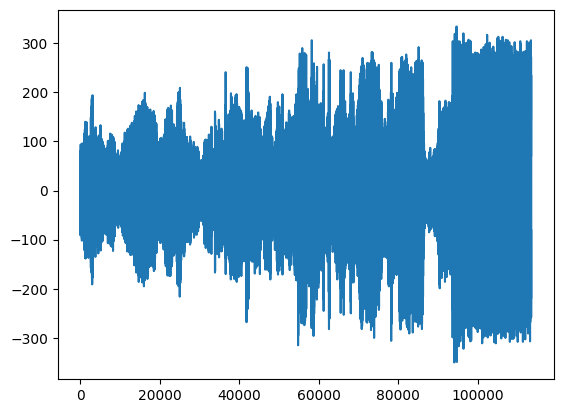

In [11]:
sns.lineplot(res.csi[:,1,1,1])

<Axes: >

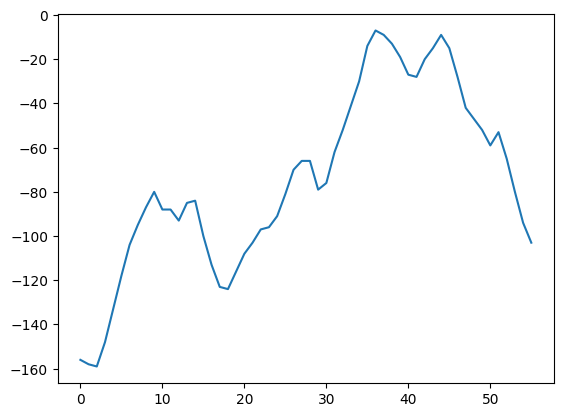

In [13]:
sns.lineplot(res.csi[0, 0, 0])

In [14]:
tstamps = map(lambda x: x.tstamp, res.status)
tstamps = list(tstamps)

In [15]:
import pandas as pd
pd.to_datetime(tstamps, unit='us')

DatetimeIndex(['2024-09-30 17:49:13.848907', '2024-09-30 17:49:13.851030',
               '2024-09-30 17:49:13.852009', '2024-09-30 17:49:13.853057',
               '2024-09-30 17:49:13.854143', '2024-09-30 17:49:13.855202',
               '2024-09-30 17:49:13.856291', '2024-09-30 17:49:13.857371',
               '2024-09-30 17:49:13.858381', '2024-09-30 17:49:13.859391',
               ...
               '2024-09-30 17:49:39.153651', '2024-09-30 17:49:39.154500',
               '2024-09-30 17:49:39.155539', '2024-09-30 17:49:39.156530',
               '2024-09-30 17:49:39.157536', '2024-09-30 17:49:39.158564',
               '2024-09-30 17:49:39.159567', '2024-09-30 17:49:39.160582',
               '2024-09-30 17:49:39.161799', '2024-09-30 17:49:39.161932'],
              dtype='datetime64[ns]', length=22362, freq=None)

In [16]:
link_info = [[s.nc, s.nr, s.rate, s.num_tones] for s in res.status] 
pd.value_counts(link_info)
# link_info

/tmp/ipykernel_10925/4222198260.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(link_info)
/tmp/ipykernel_10925/4222198260.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.value_counts(link_info)


[3, 3, 149, 56]    9748
[2, 3, 143, 56]    8864
[3, 3, 150, 56]    2144
[3, 3, 148, 56]    1446
[2, 3, 142, 56]      98
[1, 3, 135, 56]      40
[3, 3, 151, 56]      22
Name: count, dtype: int64